In [2]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import easyocr

Text(0.5, 1.0, 'Imagem Original')

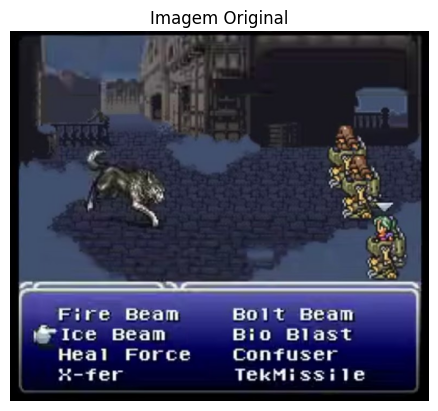

In [3]:
dicionario = {
    'Combate': '..\\FFVI\\Combat\\combate.jpg',
    'Combate2': '..\\FFVI\\Combat\\combate2.jpg',
    'Combate3': '..\\FFVI\\Combat\\combate3.jpg',
}

escolha = 'Combate' 
original_image = Image.open(dicionario[escolha])
cv2_img = np.array(original_image)
plt.imshow(cv2_img)
plt.axis('off')
plt.title('Imagem Original')

Text(0.5, 1.0, 'Cropped Image')

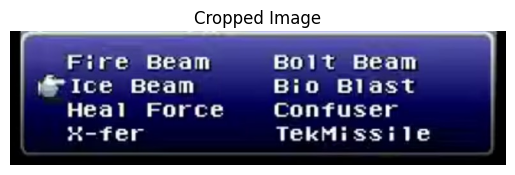

In [4]:
# Get the dimensions of the original image
width, height = original_image.size

# Define the coordinates for the bottom part of the image
left = 0
top = int(height * 0.695)
right = width
bottom = height
# Crop the image
cropped_image = original_image.crop((left, top, right, bottom))

# Display the cropped image
plt.imshow(cropped_image)
plt.axis('off')
plt.title('Cropped Image')


The image is predominantly blue


Text(0.5, 1.0, 'Blue Mask')

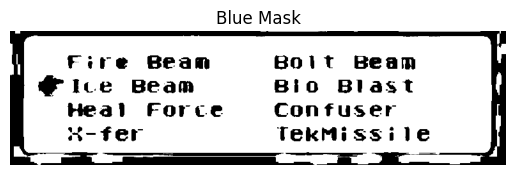

In [5]:
# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(np.array(cropped_image), cv2.COLOR_RGB2HSV)

# Define the lower and upper blue hue values
lower_blue = np.array([90, 50, 0])
upper_blue = np.array([130, 255, 255])

# Create a mask to filter out non-blue pixels
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Count the number of blue pixels
blue_pixel_count = np.count_nonzero(blue_mask)

# Calculate the percentage of blue pixels
blue_pixel_percentage = (blue_pixel_count / (cropped_image.width * cropped_image.height)) * 100

# Check if the image is predominantly blue
if blue_pixel_percentage > 75:
    print("The image is predominantly blue")
else:
    print("The image is not predominantly blue")

# Display the blue mask
plt.imshow(blue_mask, cmap='gray')
plt.axis('off')
plt.title('Blue Mask')


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Text: Fire, Probability: 0.9936919808387756
Text: Beam, Probability: 0.9997419118881226
Text: Bolt, Probability: 0.315560907125473
Text: Beam, Probability: 0.9989247918128967
Text: Ice, Probability: 0.9997991010243517
Text: Beam, Probability: 0.9998857975006104
Text: Bio, Probability: 0.9738527797365641
Text: Blast, Probability: 0.9890422296570502
Text: Heal, Probability: 0.9521127939224243
Text: Force, Probability: 0.9997724612642498
Text: Confuser, Probability: 0.9372309053686058
Text: x-fer, Probability: 0.7916324794353388
Text: tekMissile, Probability: 0.9262186531047418


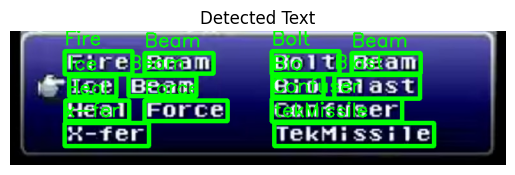

True

In [6]:
#clear the file used to tstore the text
with open('results\\Combat\\saida_texto.txt', 'w') as f:
    f.write('')

reader = easyocr.Reader(['en'])
#transform cropped image to np array
cropped_cv2 = np.array(cropped_image)
result = reader.readtext(cropped_cv2, allowlist='ABCDEFGHIJKLMNOPQRSUVWXYZabcdefghijklmnopqrstuvwxyz0123456789-,.?!@#$%')

for (bbox, text, prob) in result:
    print(f'Text: {text}, Probability: {prob}')
    # Display the text and the bounding box
    (top_left, top_right, bottom_right, bottom_left) = bbox
    cv2.rectangle(cropped_cv2, top_left, bottom_right, (0, 255, 0), 5)
    cv2.putText(cropped_cv2, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    # write every text in a file, but before+-
    with open('results\\Combat\\saida_texto.txt', 'a') as f:
        f.write(text + '\n')

# Display the image with the detected text
plt.imshow(cropped_cv2)
plt.axis('off')
plt.title('Detected Text')
plt.show()
# Save the image with the detected text, the archive name must be the same as the image name
cv2.imwrite(f'results\\Combat\\{escolha}.jpg', cropped_cv2)